In [5]:
#Multiple linear regression
#chuc1803@gmail.com; bis.net.vn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [6]:
#Read dataset
data=pd.read_csv('JOB_INFO.csv')

In [7]:
data

,ENO,Age,Dept,Gender,Skill,WorkingYear,Salary,TrainedYear,OverseaProject
0,E001,29,HR,Female,SQL,3,825,3,No
1,E002,39,IT,Male,Java,16,1450,7,Yes
2,E003,33,IT,Male,SQL,6,1250,5,Yes
3,E004,38,HR,Female,C#,6,1320,5,No
4,E005,28,IT,Male,R,2,895,3,No
5,E006,36,MA,Male,C#,5,943,3,No
6,E007,27,IT,Male,SQL,2,1154,5,No
7,E008,28,MA,Female,R,6,1356,6,Yes
8,E009,37,IT,Male,Python,7,2056,5,No
9,E010,37,IT,Male,C#,6,892,3,No


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


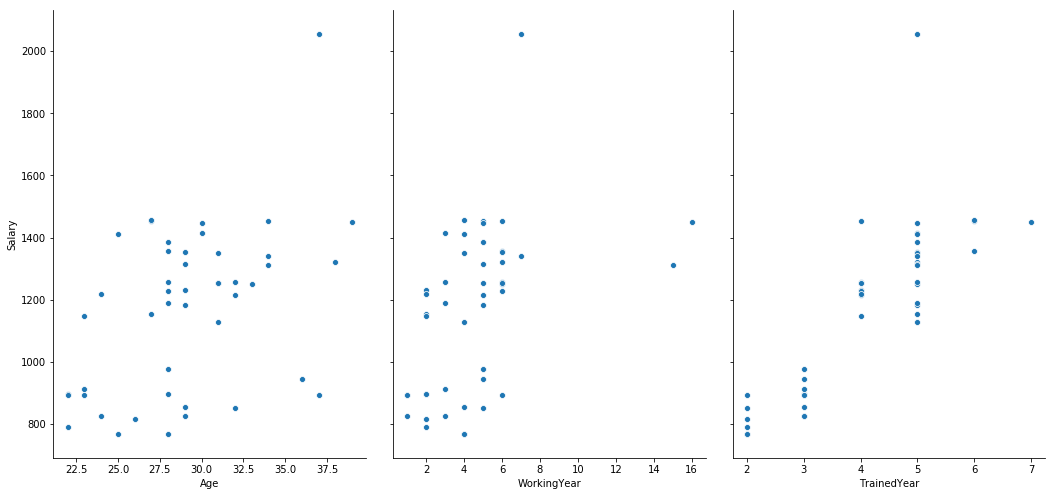

In [8]:
# visualize the relationship between the features and the response using scatterplots
import seaborn as sns
sns.pairplot(data, x_vars=['Age','WorkingYear','TrainedYear'], y_vars='Salary', size=7, aspect=0.7)

In [9]:
data.corr()

,Age,WorkingYear,Salary,TrainedYear
Age,1.000000,0.708778,0.452063,0.384803
WorkingYear,0.708778,1.000000,0.450821,0.496701
Salary,0.452063,0.450821,1.000000,0.824391
TrainedYear,0.384803,0.496701,0.824391,1.000000


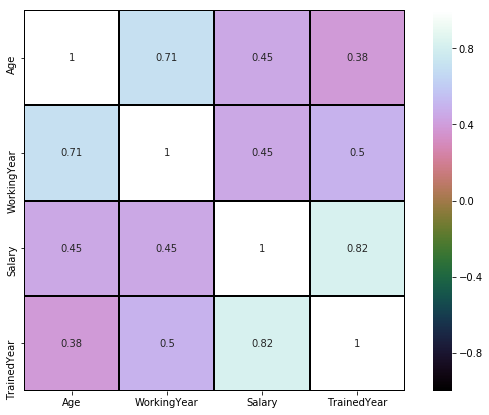

In [10]:
#Plotting heat map
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(data.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X=data[['Age','WorkingYear','TrainedYear']]
y=data['Salary'] #dependent variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [12]:
#X_train
#X_test
#y_train
y_test

34    1349
42     912
2     1250
21    1313
3     1320
28     767
23    1448
31     976
24     896
22    1454
Name: Salary, dtype: int64

In [13]:
# Instantiate model
lm = LinearRegression()

# Fit Model
lm.fit(X_train, y_train)

# Predict
y_pred = lm.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

69.47555771928684


In [14]:
# print the R-squared value for the model
lm.score(X, y)

0.7024732944371922

In [15]:
# print the coefficients
print(lm.intercept_)
print(lm.coef_)

52.70987985093211
[ 16.85268678 -13.8794567  168.13815848]


In [16]:
# pair the feature names with the coefficients
feature_cols = ['Age','WorkingYear','TrainedYear']
list(zip(feature_cols, lm.coef_))

[('Age', 16.85268677958233),
 ('WorkingYear', -13.879456695213428),
 ('TrainedYear', 168.13815847971148)]

In [17]:
# calculate MAE, MSE, RMSE
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 47.979543510688174
MSE: 4826.853120405956
RMSE: 69.47555771928684


In [18]:
# predict for a new observation
X_new = pd.DataFrame({'Age': [35], 'WorkingYear':[15], 'TrainedYear':[7]})
lm.predict(X_new)

array([1611.32917607])

In [19]:
#Predict more values
X_new=[[35,15,7],[40,20,4],[50,25,4]]
X_new=pd.DataFrame(X_new, columns=['Age','WorkingYear','TrainedYear'])
sale_predict=lm.predict(X_new)
sale_predict=pd.DataFrame(sale_predict, columns=['Salary_Predicted'])
df= pd.concat([X_new, sale_predict], axis=1)
df

,Age,WorkingYear,TrainedYear,Salary_Predicted
0,35,15,7,1611.329176
1,40,20,4,1121.780851
2,50,25,4,1220.910435


In [20]:
# exclude Newspaper
X = data[['Age','WorkingYear','TrainedYear']]
y = data['Salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

90.5018010805652


In [21]:
# exclude facebook
X = data[['Age','WorkingYear','TrainedYear']]
y = data['Salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

90.5018010805652


In [78]:
# exclude youtube
X = data[['facebook','newspaper']]
y = data['sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

# Instantiate model
lm3 = LinearRegression()

# Fit model
lm3.fit(X_train, y_train)

# Predict
y_pred = lm3.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.612911027432855
